In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [22]:
file_path = 'Nmetil.csv'

# Citește datele cu headerul corect și separare pe spații multiple
data = pd.read_csv(file_path, 
                   sep=r'\s+',   # separă după spații multiple
                   header=0,     # prima linie e header
                   engine='python')

# Curăță numele coloanelor: elimină parantezele și spațiile
data.columns = [col.replace(' ', '').replace('(', '').replace(')', '') for col in data.columns]

print("Datele au fost încărcate corect!")
print("\nColoane:", data.columns.tolist())
print("\nPrimele 5 rânduri:\n", data.head())


Datele au fost încărcate corect!

Coloane: ['Step', 'TK', 'E_KSeV', 'E_toteV', 'VolA^3', 'PkBar']

Primele 5 rânduri:
    Step    TK      E_KSeV     E_toteV    VolA^3  PkBar
0     1  0.00 -1300.41332 -1300.41332  2468.205  0.510
1     2  0.01 -1300.41334 -1300.41332  2468.205  0.508
2     3  0.04 -1300.41340 -1300.41332  2468.205  0.502
3     4  0.08 -1300.41350 -1300.41332  2468.205  0.495
4     5  0.14 -1300.41364 -1300.41332  2468.205  0.483


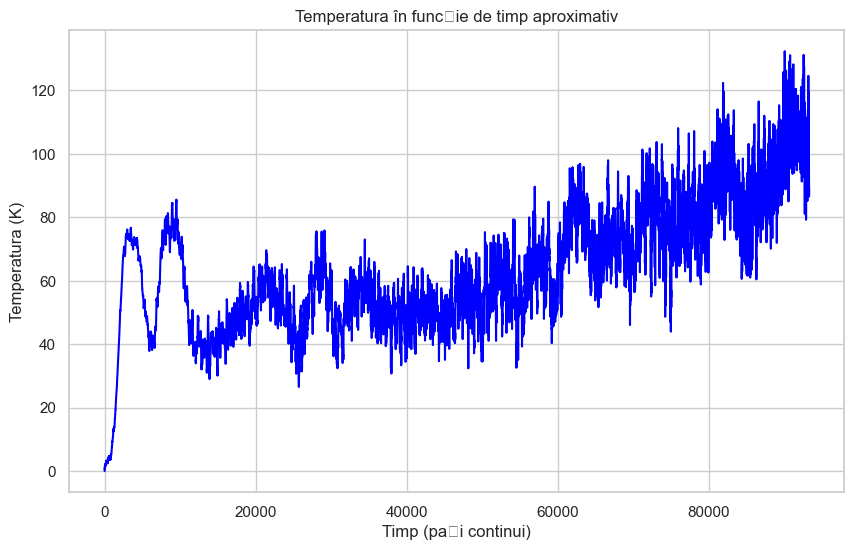

In [28]:
sns.set(style="whitegrid")

# Creează o coloană 'Time' pe baza indexului liniilor
data['Time'] = np.arange(len(data))

plt.figure(figsize=(10,6))
sns.lineplot(x='Time', y='TK', data=data, color='blue')
plt.title('Temperatura în funcție de timp aproximativ')
plt.xlabel('Timp (pași continui)')
plt.ylabel('Temperatura (K)')
plt.show()


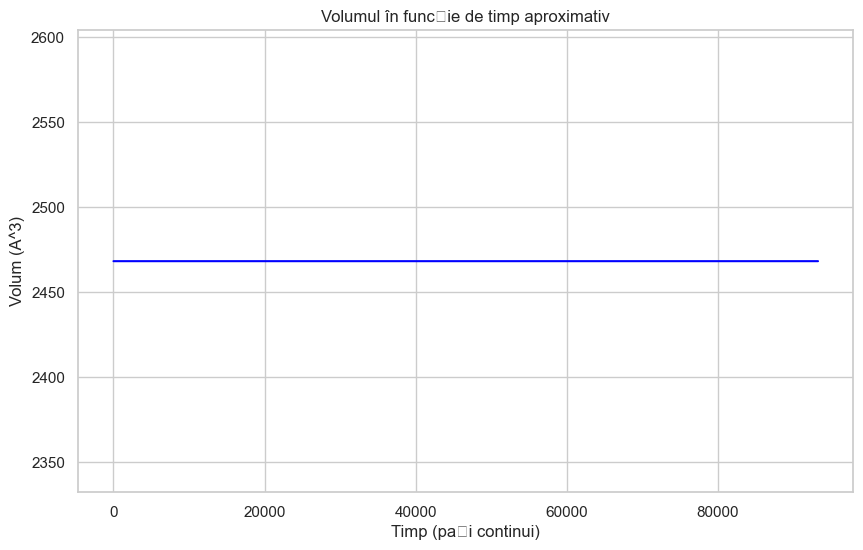

In [29]:
sns.set(style="whitegrid")

# Creează o coloană 'Time' pe baza indexului liniilor
data['Time'] = np.arange(len(data))

plt.figure(figsize=(10,6))
sns.lineplot(x='Time', y='VolA^3', data=data, color='blue')
plt.title('Volumul în funcție de timp aproximativ')
plt.xlabel('Timp (pași continui)')
plt.ylabel('Volum (A^3)')
plt.show()


/tmp/ipykernel_5999/1920770824.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Nmetil.csv", comment='#', delim_whitespace=True)


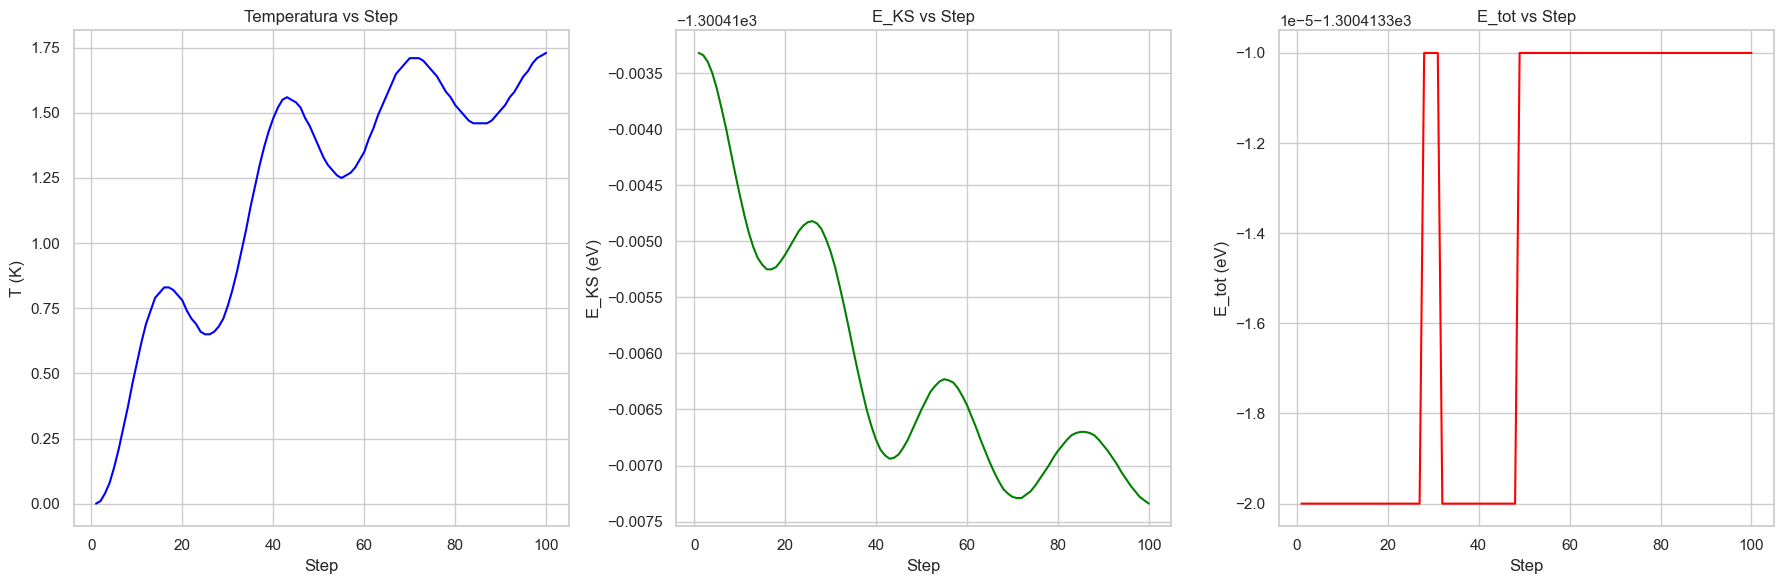

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Încarcă datele din CSV (ignoră liniile cu # dacă există)
data = pd.read_csv("Nmetil.csv", comment='#', delim_whitespace=True)

# Selectează primele 100 de rânduri
data_100 = data.head(100)

# Setează stilul pentru grafice
sns.set(style="whitegrid")

# Creează figura cu 3 grafice
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: T(K) vs Step
sns.lineplot(x='Step', y='T(K)', data=data_100, ax=axes[0], color='blue')
axes[0].set_title('Temperatura vs Step')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('T (K)')

# Plot 2: E_KS vs Step
sns.lineplot(x='Step', y='E_KS(eV)', data=data_100, ax=axes[1], color='green')
axes[1].set_title('E_KS vs Step')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('E_KS (eV)')

# Plot 3: E_tot vs Step
sns.lineplot(x='Step', y='E_tot(eV)', data=data_100, ax=axes[2], color='red')
axes[2].set_title('E_tot vs Step')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('E_tot (eV)')

plt.tight_layout()
plt.show()


/tmp/ipykernel_5999/1983069916.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Nmetil.csv", comment='#', delim_whitespace=True)


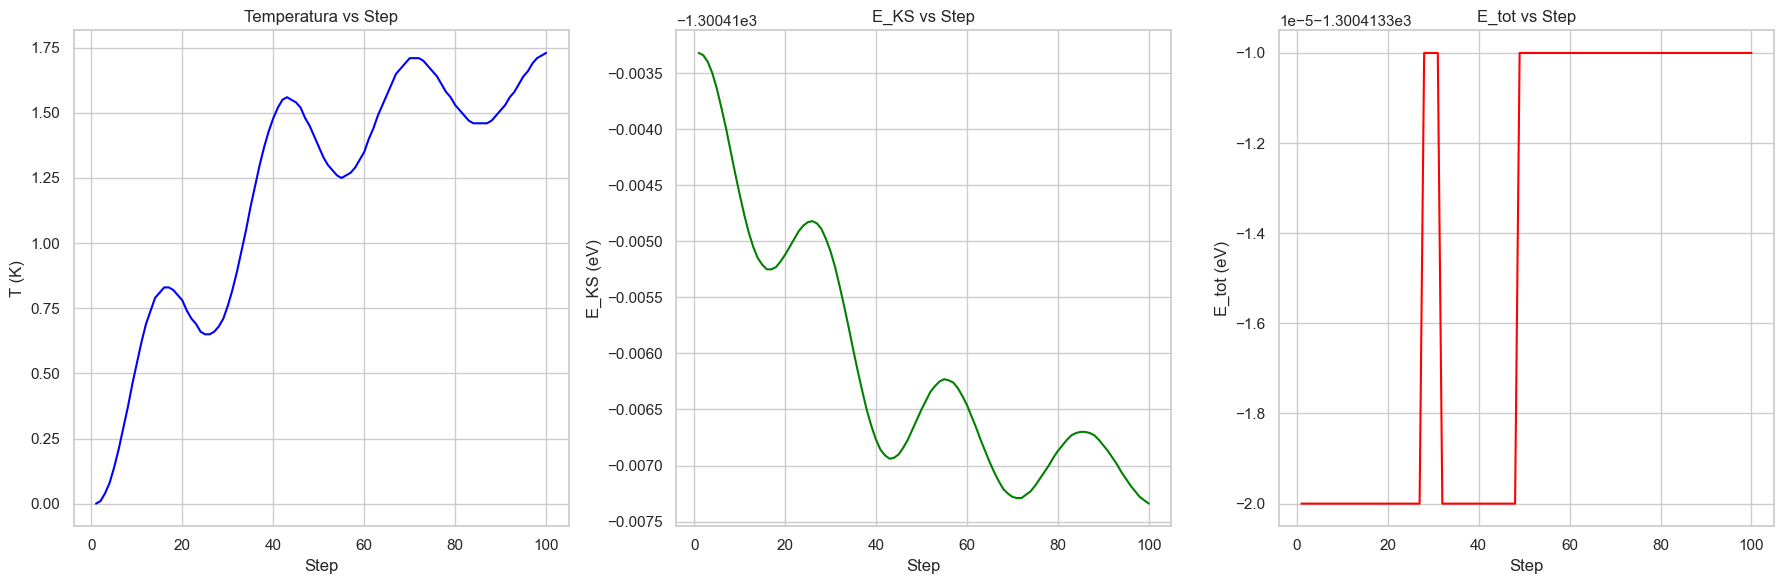

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Încarcă datele din CSV (ignoră liniile cu # dacă există)
data = pd.read_csv("Nmetil.csv", comment='#', delim_whitespace=True)

# Selectează rândurile 101-200 (index 100-199)
data_next100 = data.iloc[100:200]

# Setează stilul pentru grafice
sns.set(style="whitegrid")

# Creează figura cu 3 grafice
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: T(K) vs Step
sns.lineplot(x='Step', y='T(K)', data=data_100, ax=axes[0], color='blue')
axes[0].set_title('Temperatura vs Step')
axes[0].set_xlabel('Step')
axes[0].set_ylabel('T (K)')

# Plot 2: E_KS vs Step
sns.lineplot(x='Step', y='E_KS(eV)', data=data_100, ax=axes[1], color='green')
axes[1].set_title('E_KS vs Step')
axes[1].set_xlabel('Step')
axes[1].set_ylabel('E_KS (eV)')

# Plot 3: E_tot vs Step
sns.lineplot(x='Step', y='E_tot(eV)', data=data_100, ax=axes[2], color='red')
axes[2].set_title('E_tot vs Step')
axes[2].set_xlabel('Step')
axes[2].set_ylabel('E_tot (eV)')

plt.tight_layout()
plt.show()
